# Easy Plotting for ECIS Data

This script will take Electrical Cell-substrate Impedance Sensing (ECIS) data in Excel format and generate sets of plots. Variables that will need to be specified between experiments can be found in the next cell; these include the full path of the Excel file, the name of the experimental conditions (ideally shortened, like '+ US' or 'No Cells'), and others such as the frequencies of interest for plotting. This is followed by a block of code that will need to be run regardless of which plot you want to generate, and then the cells containing the code for generating each specific plot. For these, select whichever you want/need. Cells can be run by clicking on them, then holding ctrl and pressing enter. 

# Variables to change

* The full file path will need to be given. You can find this by right-clicking on the excel file you want to use, and clicking properties; the file path is given after 'Location:'. You will need to add an extra '\' after each '\' in the path you copy (i.e., there should always be '\\' rather than a single '\' when you specify it below).

* The file name is simply the name of the file you want to use, including the .xls .

* The conditions are the experimental conditions you used; for example, if you had a group with ultrasound and a control, you may use:

> `cond1 = '+ US'
cond2 = '- US'`

* The grplabels will need to be changed depending on which beans were in each group. You can change between cond1 and cond2 depending on which group each bean belonged to. For example, if Beans 1-4 were all controls, and Beans 5-8 were all experimental, you could use:

> `grplabels = {'A01':cond1,'A02':cond1,'A03':cond1,'A04':cond1,
             'A05':cond2,'A06':cond2,'A07':cond2,'A08':cond2}`
             

* Colors probably won't need changed, but you can if you want. Currently using a blue and an orange.

* The frequencies you're interested in can be specified in fr. Currently, I have it using all of the frequencies that the amchine collects, but if you've collected fewer frequencies or are only interested in a few, you can delete some of them or add them back in later if you want. For example, if you only wanted to look at 2000, 4000, and 64000 Hz, you could use

> `fr = ['2000 Hz','4000 Hz','64000 Hz']`

In [265]:
# Location of Excel file, full path and then filename
filepath = 'E:\\ECIS\\2019-03-15(ECIS_first_attempt_day3)\\data\\'
filename = 'Bull_lab_3-14-19_continued_3.xls'

# Specify experimental conditions
cond1 = 'Cells'
cond2 = 'No Cells'

# Group labels, e.g., Beans 1-4 = No US, Beans 5-8 = + US
# Beans are written as 'A01', for example - assumes chip is in A, not B
grplabels = {'A01':cond2,'A02':cond2,'A03':cond1,'A04':cond1,
             'A05':cond2,'A06':cond2,'A07':cond1,'A08':cond1}

# Specify colors for plotting later. Currently have cond1 = default blue, cond2 = default orange
colors = {cond1:'#1f77b4', cond2:'#ff7f0e'}

# Select which frequencies you want to plot later; starting with all available
fr = ['62.5 Hz','125 Hz','250 Hz','500 Hz','1000 Hz','2000 Hz',
      '4000 Hz','8000 Hz','16000 Hz','32000 Hz','64000 Hz']

# Setup code - run regardless of which plot you want

__Don't change anything in the following cells - just run with ctrl+enter!__

In [266]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read in data; save all frequencies sequentially in list
xls = pd.ExcelFile(filepath + filename)
dat = [pd.read_excel(xls, x) for x in fr]

# For relabeling as beans later
bean = {'A01':'Bean 1','A02':'Bean 2','A03':'Bean 3','A04':'Bean 4',
        'A05':'Bean 5','A06':'Bean 6','A07':'Bean 7','A08':'Bean 8'}

# Specify parameters for subplotting depending on number of frequencies
npltcols = 3
if len(fr) <= 3:
    npltrows = 1
if len(fr) <= 6:
    npltrows = 2
if len(fr) <= 9:
    npltrows = 3
if len(fr) <= 12:
    npltrows = 4

# Generate list of colnames for Z, R, and C
znames = ['A0' + str(i+1) + ' Z' for i in range(len(bean))]
rnames = ['A0' + str(i+1) + ' R' for i in range(len(bean))]
cnames = ['A0' + str(i+1) + ' C' for i in range(len(bean))]

# Generate dictionary to get names list easily
namesdict = {'Z':znames, 'R':rnames, 'C':cnames}

# Generate dictionary to get bean list or grplabels easily
bngpdict = {'Bean':bean, 'Group':grplabels}

# Plotting functions - run regardless of which plot you want

These functions are used to generate the plots later on. While they aren't all needed for each kind of plot, I do use some across multiple types of plot (e.g., SinglePlot()), so it's best to __run all of these cells before moving on.__ Reminder, cells are run by clicking on them, then holding ctrl and pressing enter.

### Single plot

In [267]:
def SinglePlotSetup(param, datnum, freqFlag, xlab, fig, ax):
    # Generate title, x- and y-labels
    freq = fr[datnum]
    if freqFlag == False:    
        plt.title(param + ', ' + freq)
    if freqFlag == True:
        plt.title(param + ' vs. Frequency')
    plt.xlabel(xlab)
    if param == 'Z':
        plt.ylabel(param + ' (ohm)')
    elif param == 'R':
        plt.ylabel(param + ' (ohm)')
    else:
        plt.ylabel(param + ' (nF)')
    
    # Remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    return

def SinglePlot(namelist, data, timeOrFreq, beanOrGroup, fig, ax):
    for name in namelist:
        # Plot, labeling either each bean or each group
        if beanOrGroup == bean:
            ax.plot(data[timeOrFreq], data[name], label = beanOrGroup[name[:-2]])
        if beanOrGroup == grplabels:
            ax.plot(data[timeOrFreq], data[name], label = beanOrGroup[name[:-2]], 
                    color = colors[grplabels[name[:-2]]])
    
    return

### ZRC subplots

In [268]:
def ZRCSubplotSetup(title, xlab, ylabs, fig, axs):
    # Add overarching title, x- and y-labels
    axs[0].set_title(title)
    plt.xlabel(xlab)    
    for i in range(len(axs)):
        axs[i].set_ylabel(ylabs[i])
    
    # Remove top and right spines
    for ax in axs:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    
    return

### Single parameter subplots

In [269]:
def SubplotsSetup(param, fig, axs): 
    # Remove top and right spines, set labels and title
    i = 0
    for axrow in axs:
        for ax in axrow:
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            
            ax.set_xlabel('Time (hrs)')
            if param == 'Z' or 'R':
                ax.set_ylabel(param + ' (ohm)')
            else:
                ax.set_ylabel(param + ' (nF)')
            
            if i <= len(fr)-1:
                ax.set_title(param + ', ' + fr[i])
                i += 1
                
    return

### General

In [270]:
def GenerateLegend(ax):
    # Remove redundant labels when labeling by group
    hand, labl = ax.get_legend_handles_labels()
    ax.legend(np.unique(labl))
    leg = ax.get_legend()
    leg.legendHandles[0].set_color(colors[cond1])
    leg.legendHandles[1].set_color(colors[cond2])
    
    return

# Plotting code - run cells based on which plots you want

The following cells generate different kinds of plots; a short description is provided before each to indicate what sort of plot it creates and what parameters, if any, need changed before running. No need to run each cell; __run only those cells that generate the plots you're interested in.__

### Single plot, Z or R or C at specified frequency

The only things you may need to change here are the __frequency__, the __parameter of interest__, and whether you want the data labeled __by individual bean or by group__. The plot will save to the same folder in which your Excel sheet resides, with a file name like 'Z4000 Hz Group.jpg', for example. This is probably most useful if we know a specific parameter and frequency that interests us (e.g., maybe Z at 4000 Hz is the best indicator of barrier function), or for early exploration of the data.

Example of variables you could use (16,000 Hz, capacitance, labeling each bean):
>`frequency = '16000 Hz'  # Can be any of the frequencies used
parameter = 'C'         # Can be 'Z', 'R', or 'C'
BeanOrGroup = 'Bean'    # Can be 'Group' or 'Bean'`

<IPython.core.display.Javascript object>


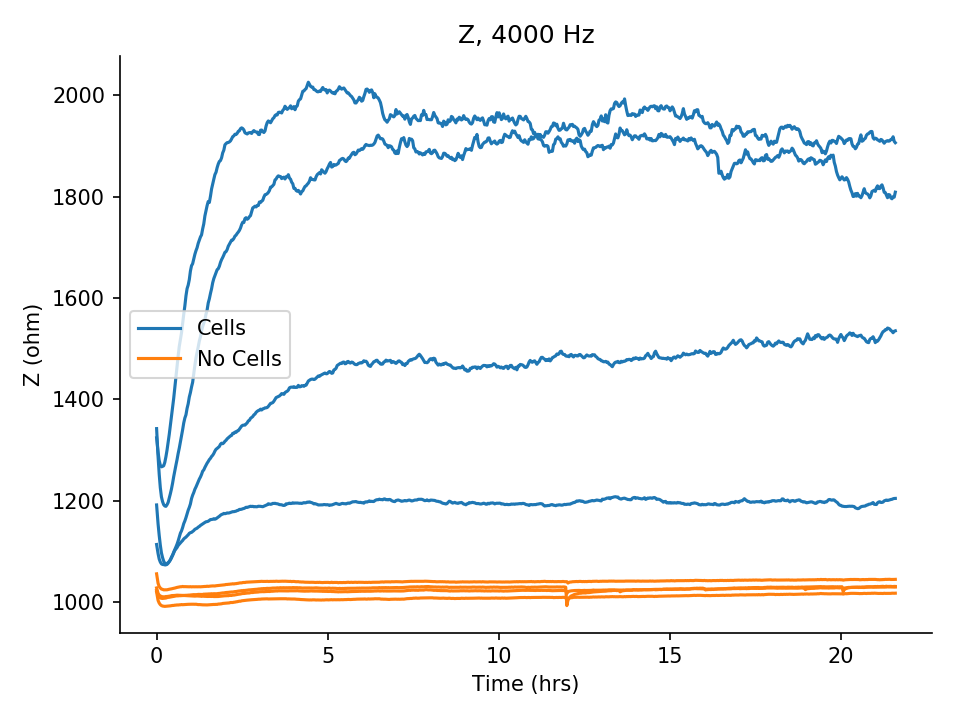

In [271]:
%matplotlib notebook

# Specify variables for the plot
frequency = '4000 Hz'  # Can be any of the frequencies used
parameter = 'Z'        # Can be 'Z', 'R', or 'C'
BeanOrGroup = 'Group'  # Can be 'Group' or 'Bean'

# Do the actual plotting
fig, ax = plt.subplots(1, 1)
SinglePlotSetup(parameter, fr.index(frequency), False, 'Time (hrs)', fig, ax)
SinglePlot(namesdict[parameter], dat[fr.index(frequency)], 'Time (hrs)', bngpdict[BeanOrGroup], fig, ax)
GenerateLegend(ax)

# Save the plot
plt.tight_layout()
plt.savefig(filepath + parameter + frequency + ' ' + BeanOrGroup + '.jpg', dpi=200)

### Subplots, Z/R/C at each frequency

This cell will generate a plot containing three subplots, one each for Z, R, and C. It will do this for each frequency you specified in the initial cell, then create a folder called 'AllParametersSingleFrequencySubplots' (if it doesn't already exist) and save the plots there. The filenames will be the frequencies of interest specified in the first cell of this notebook plus 'Bean' or 'Group' depending on which you chose.

You can choose to plot the colors/labels by __bean or group.__ Example of variables you could use (labeling each bean):
>`BeanOrGroup = 'Bean'    # Can be 'Group' or 'Bean'`

<IPython.core.display.Javascript object>


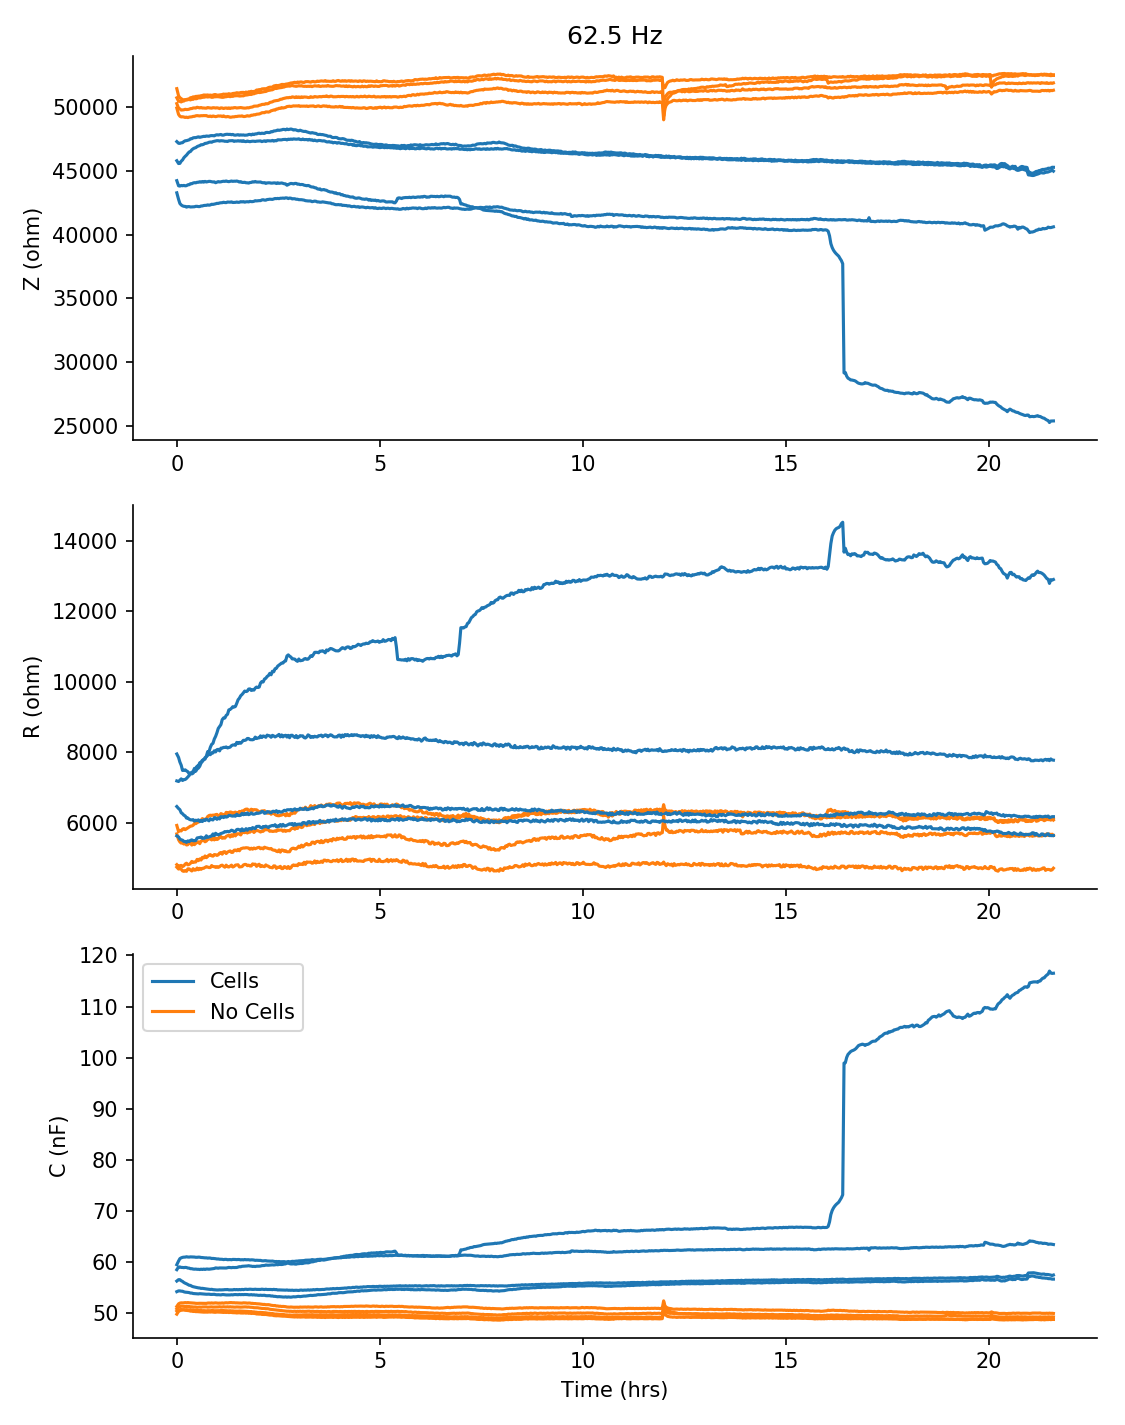

<IPython.core.display.Javascript object>


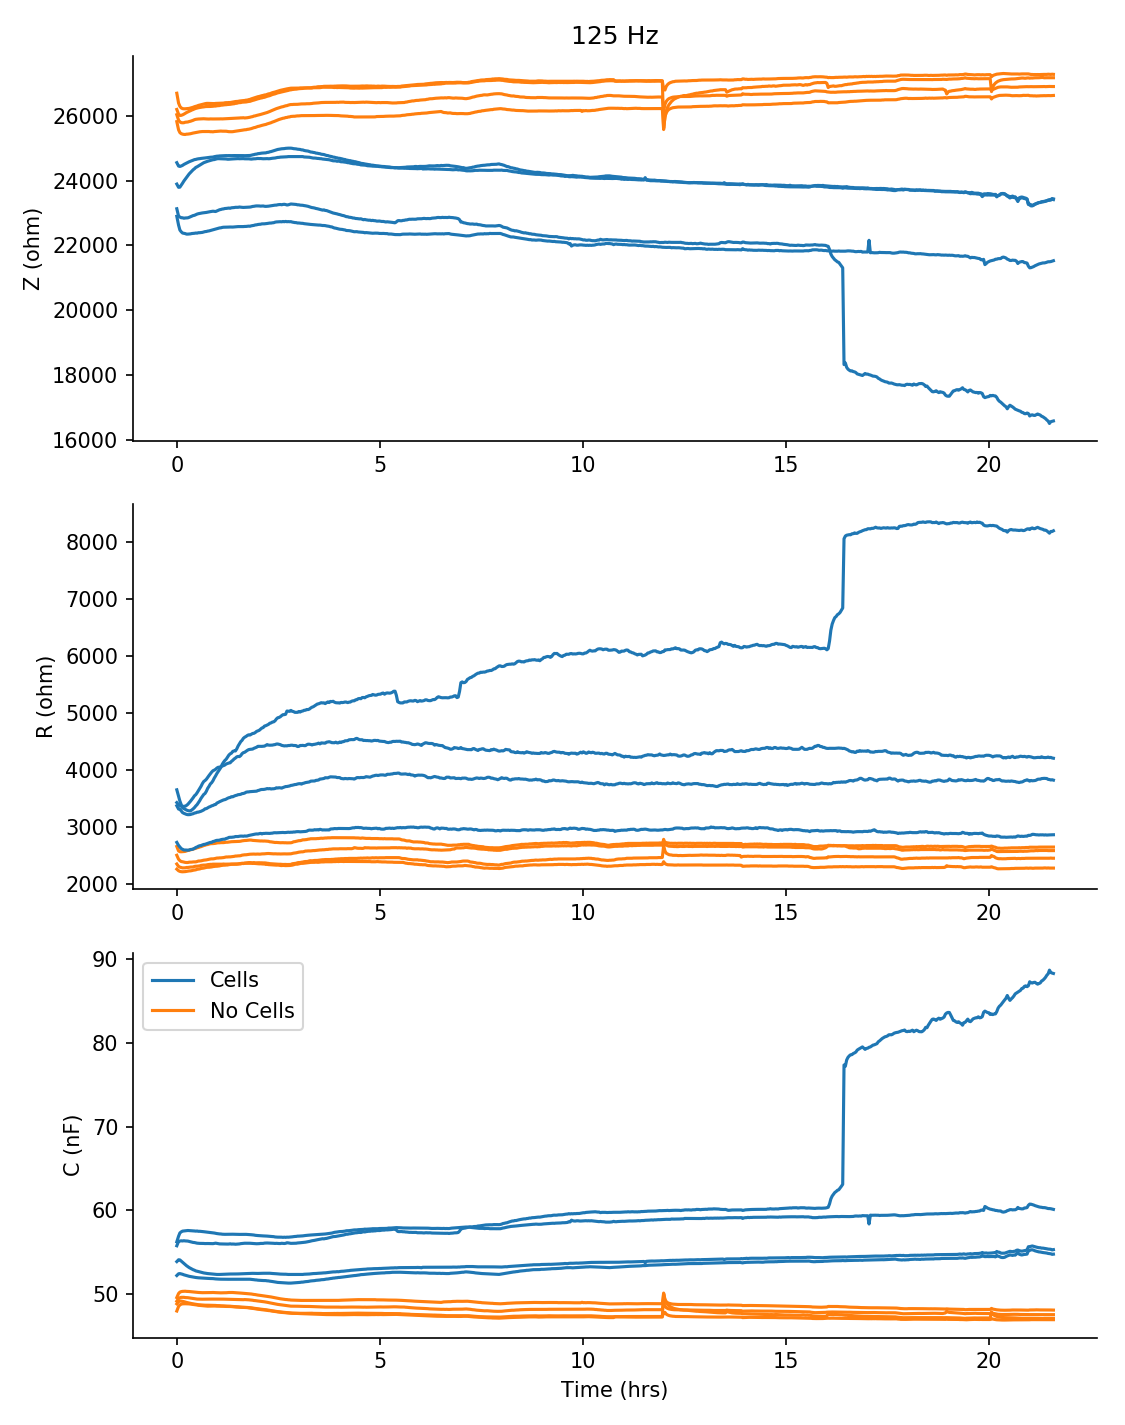

<IPython.core.display.Javascript object>


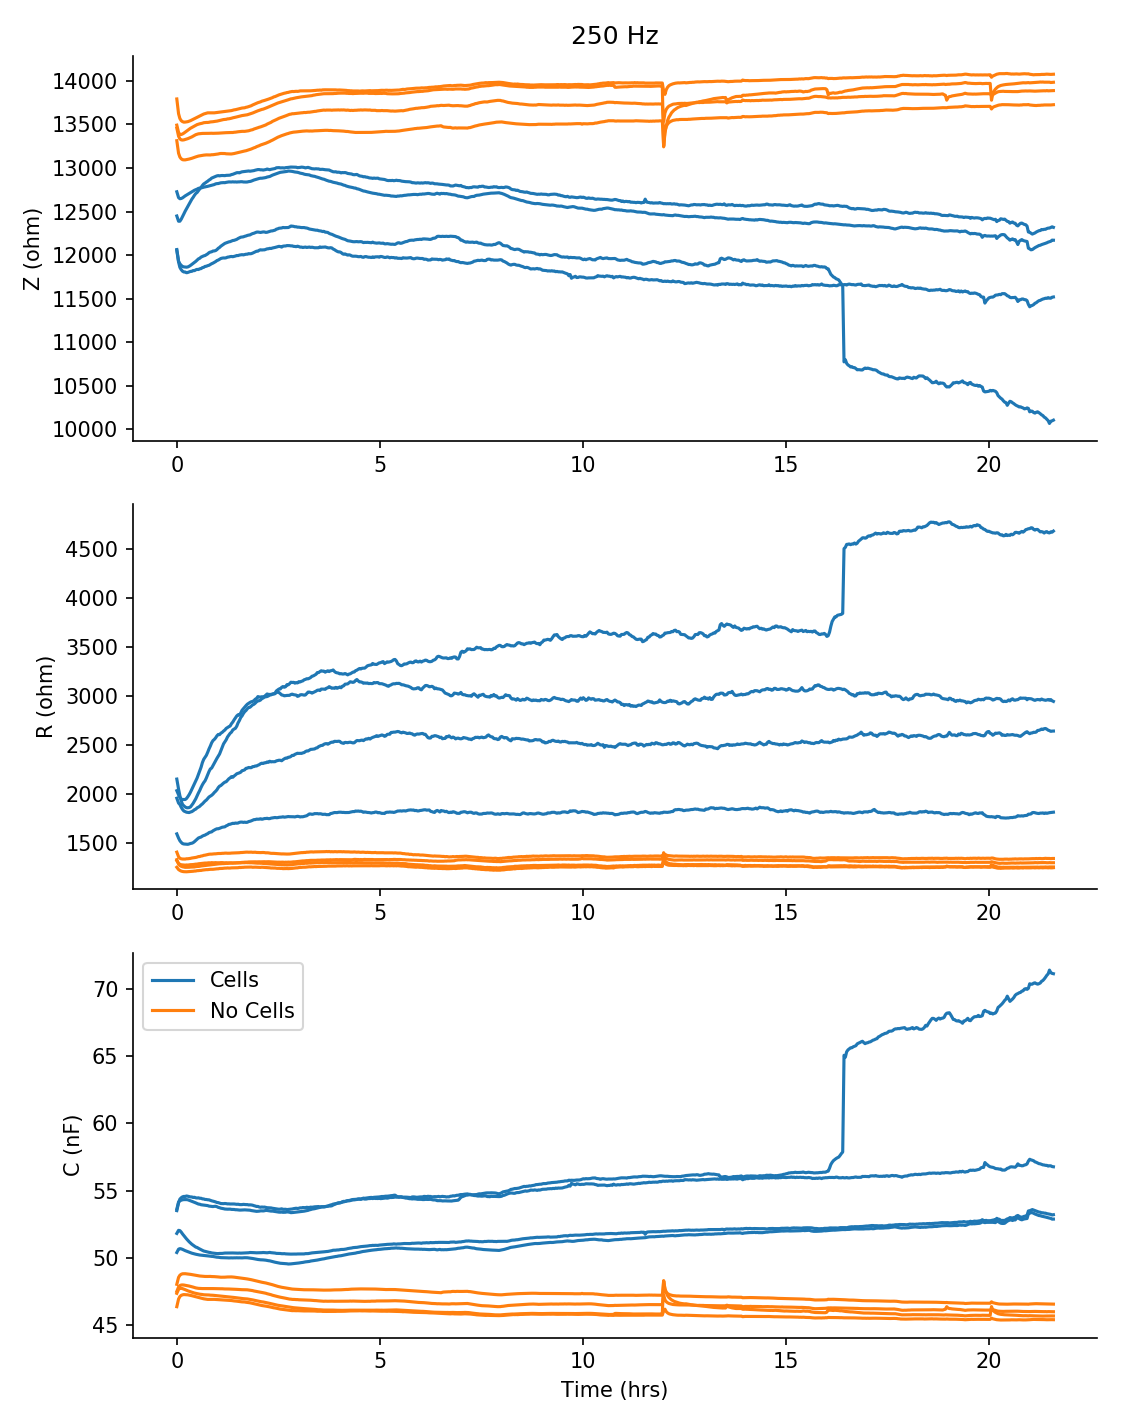

<IPython.core.display.Javascript object>


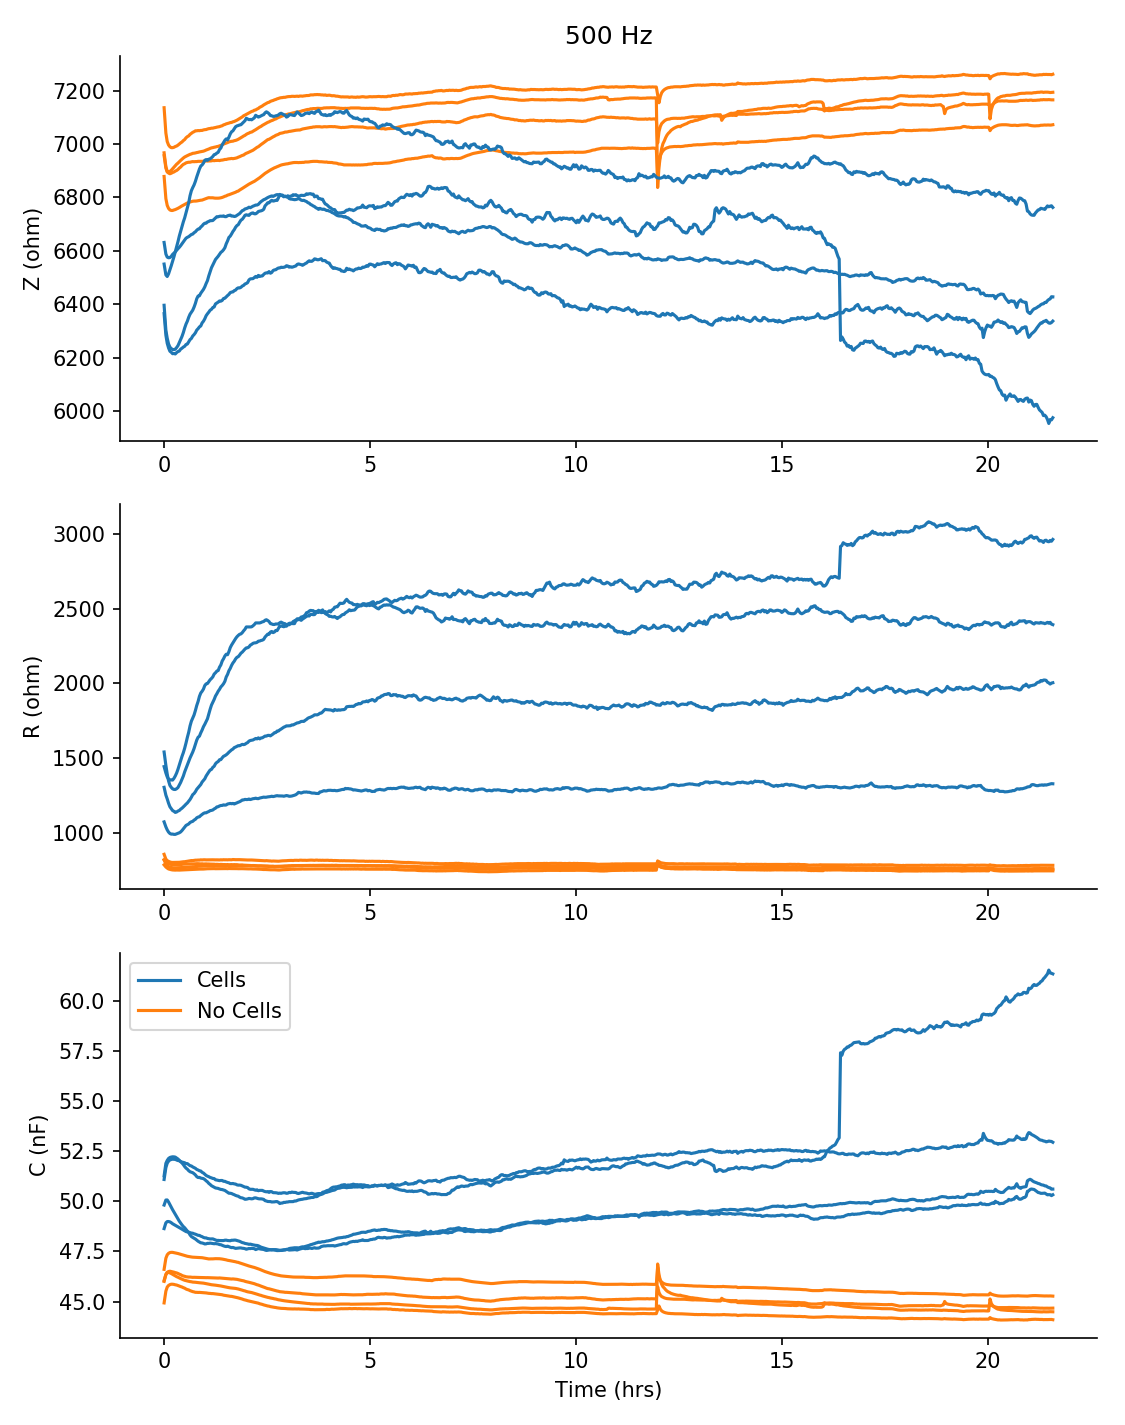

<IPython.core.display.Javascript object>


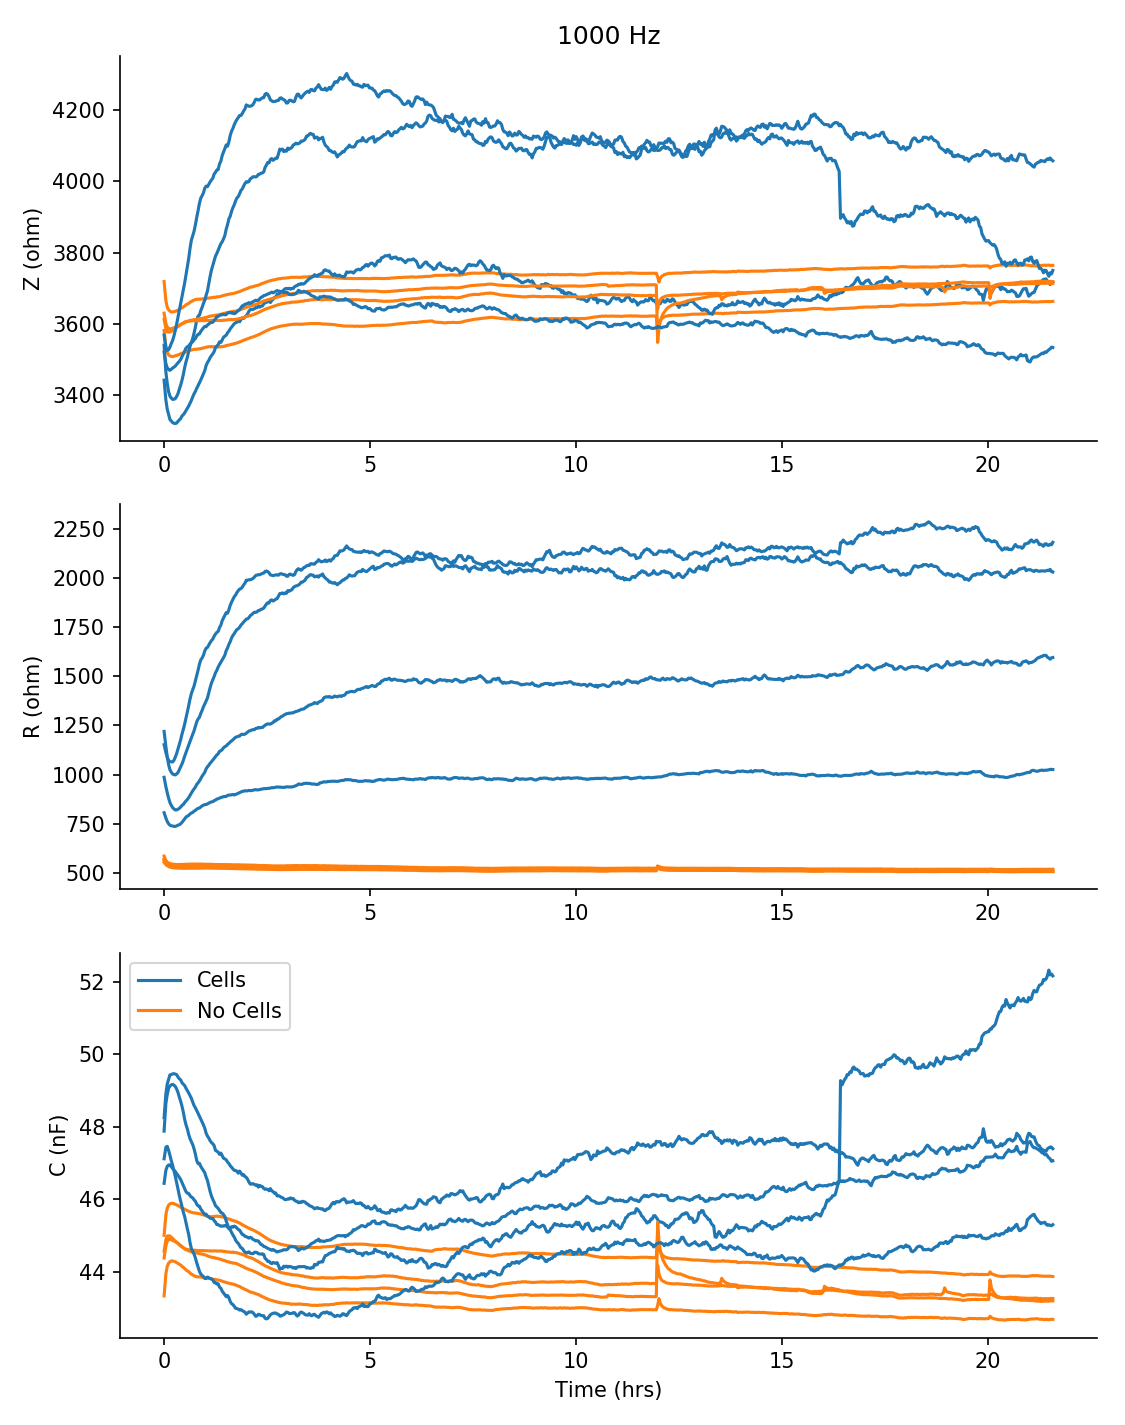

<IPython.core.display.Javascript object>


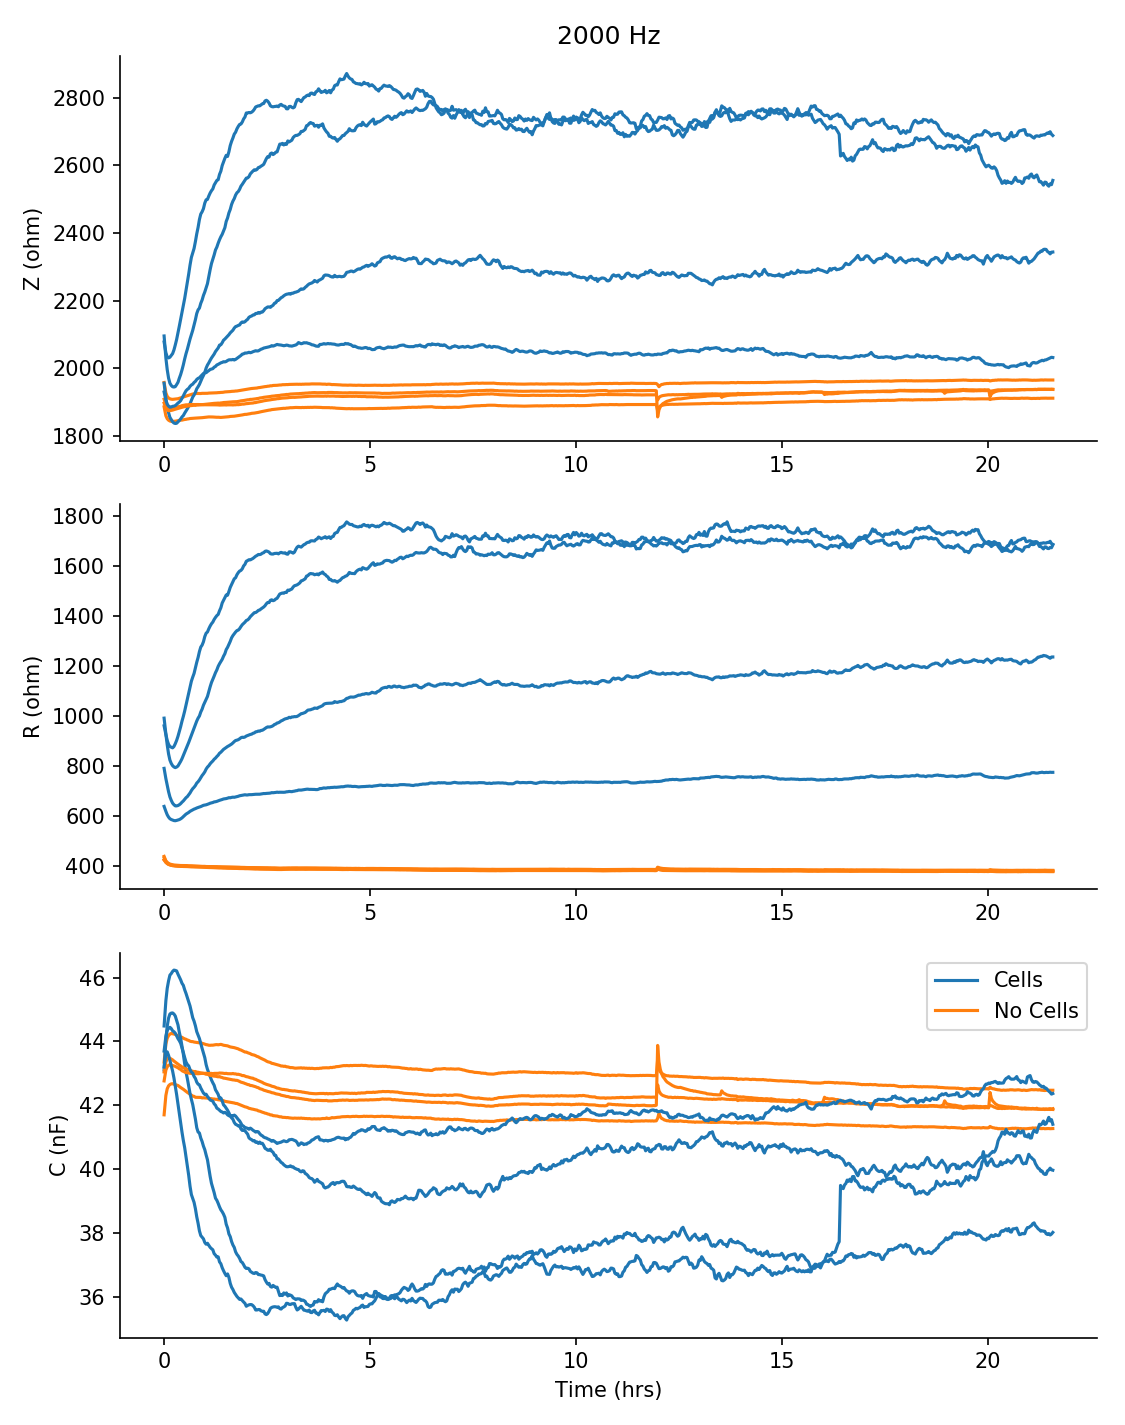

<IPython.core.display.Javascript object>


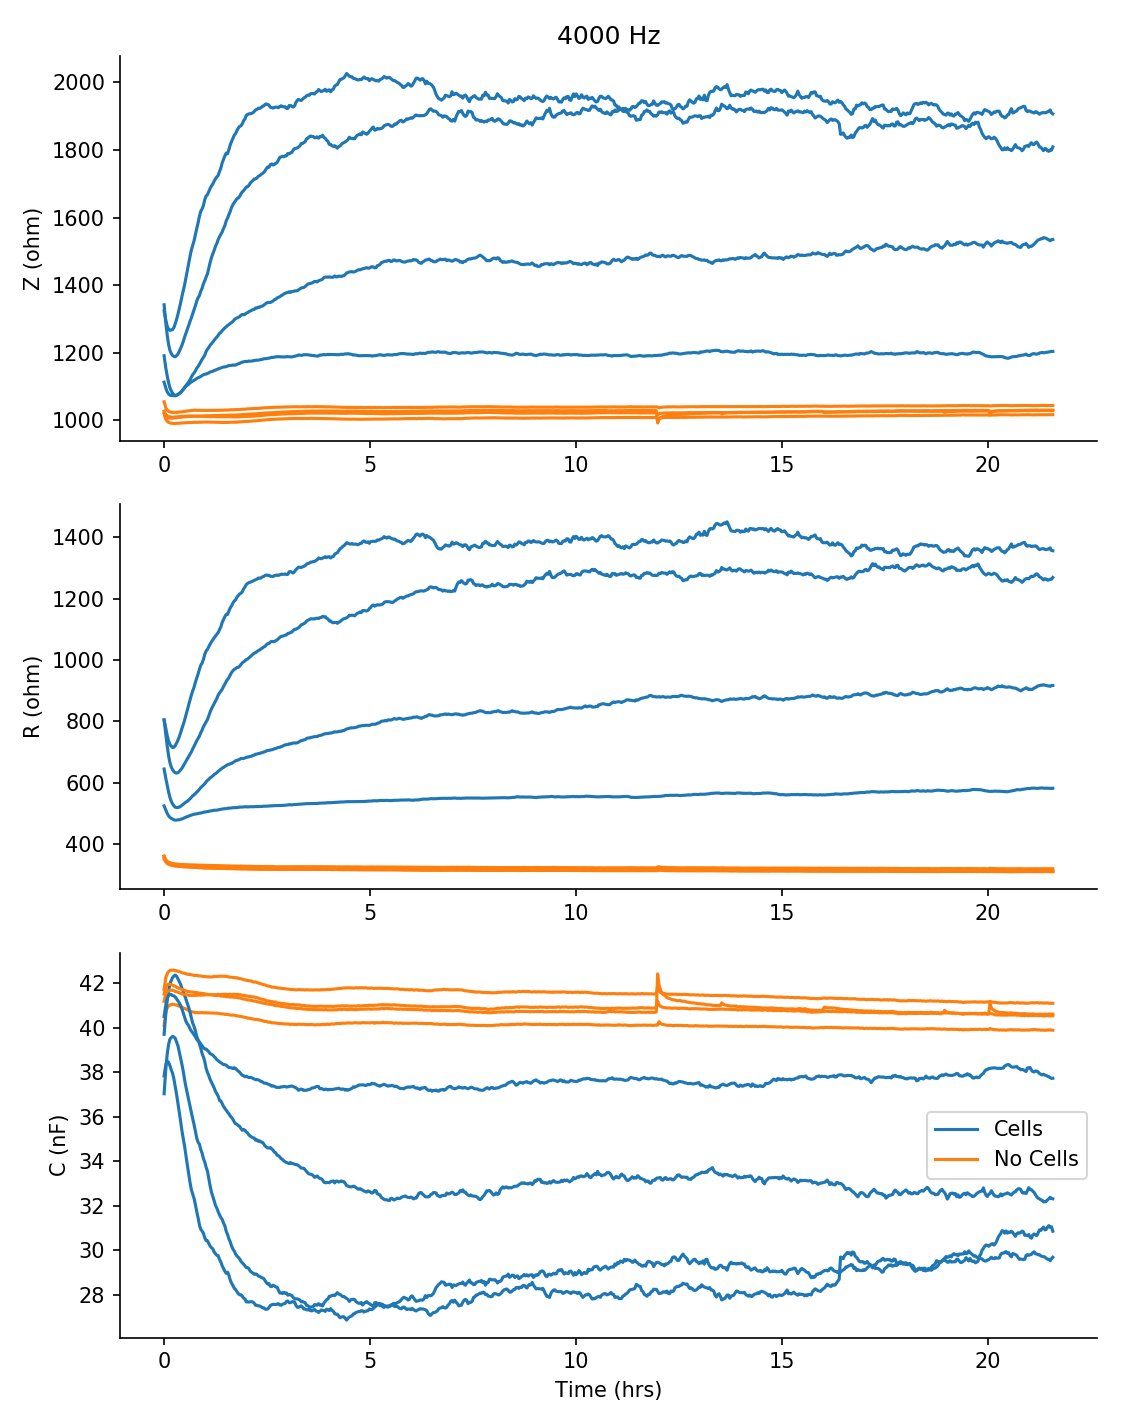

<IPython.core.display.Javascript object>


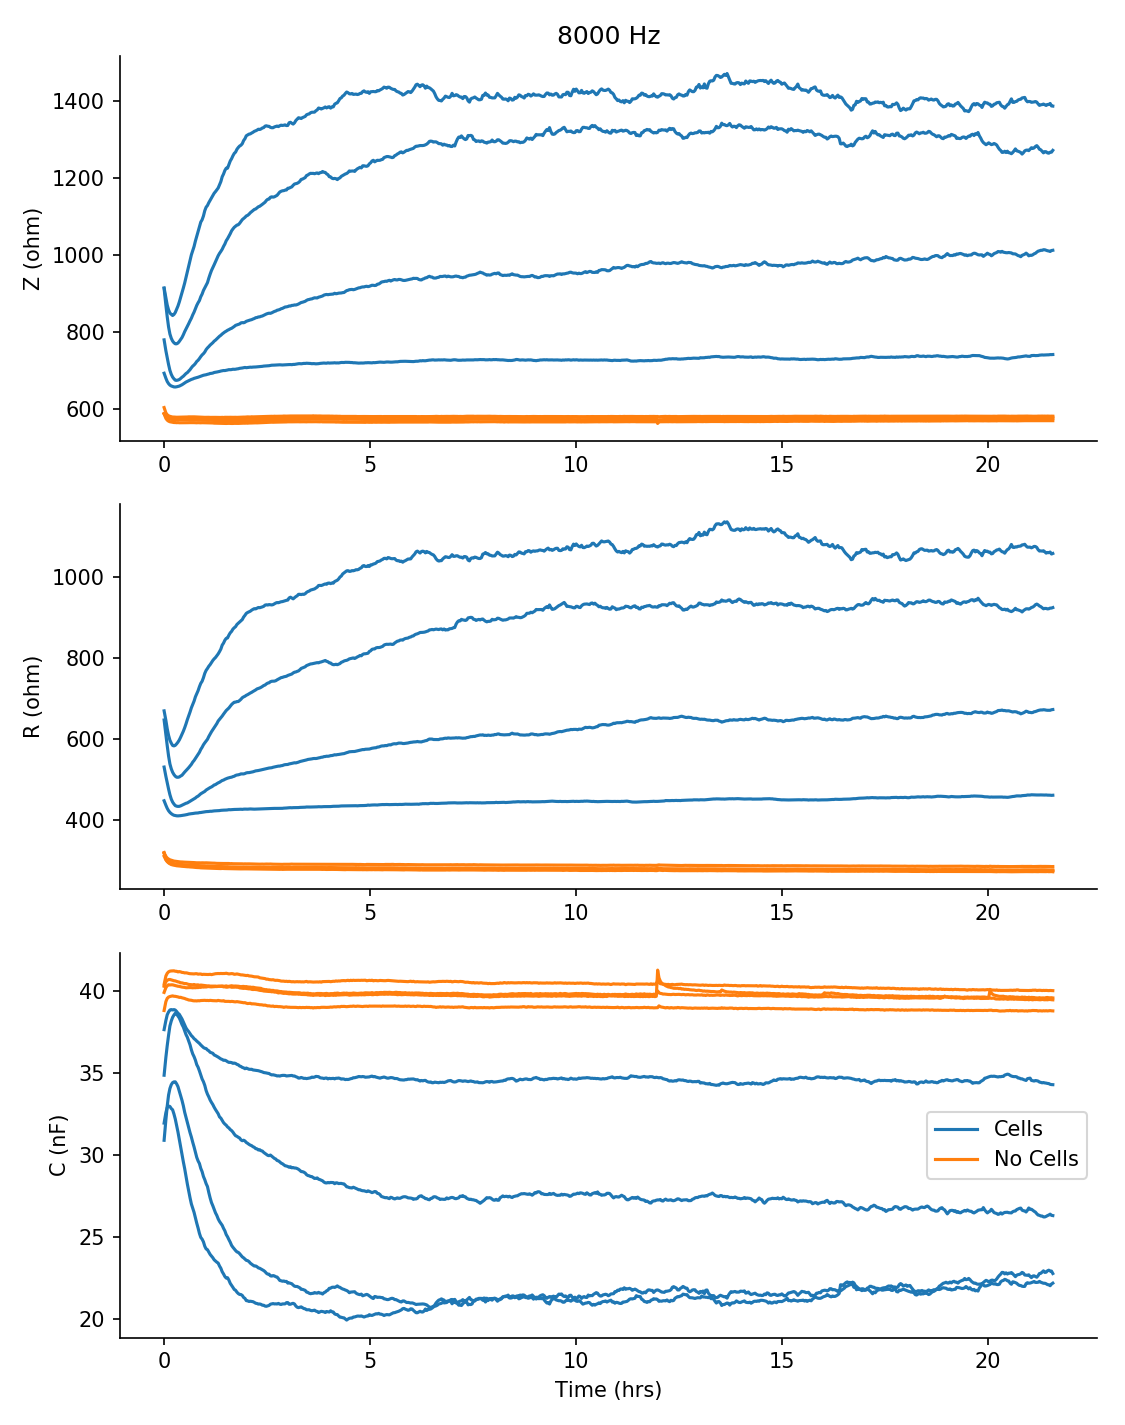

<IPython.core.display.Javascript object>


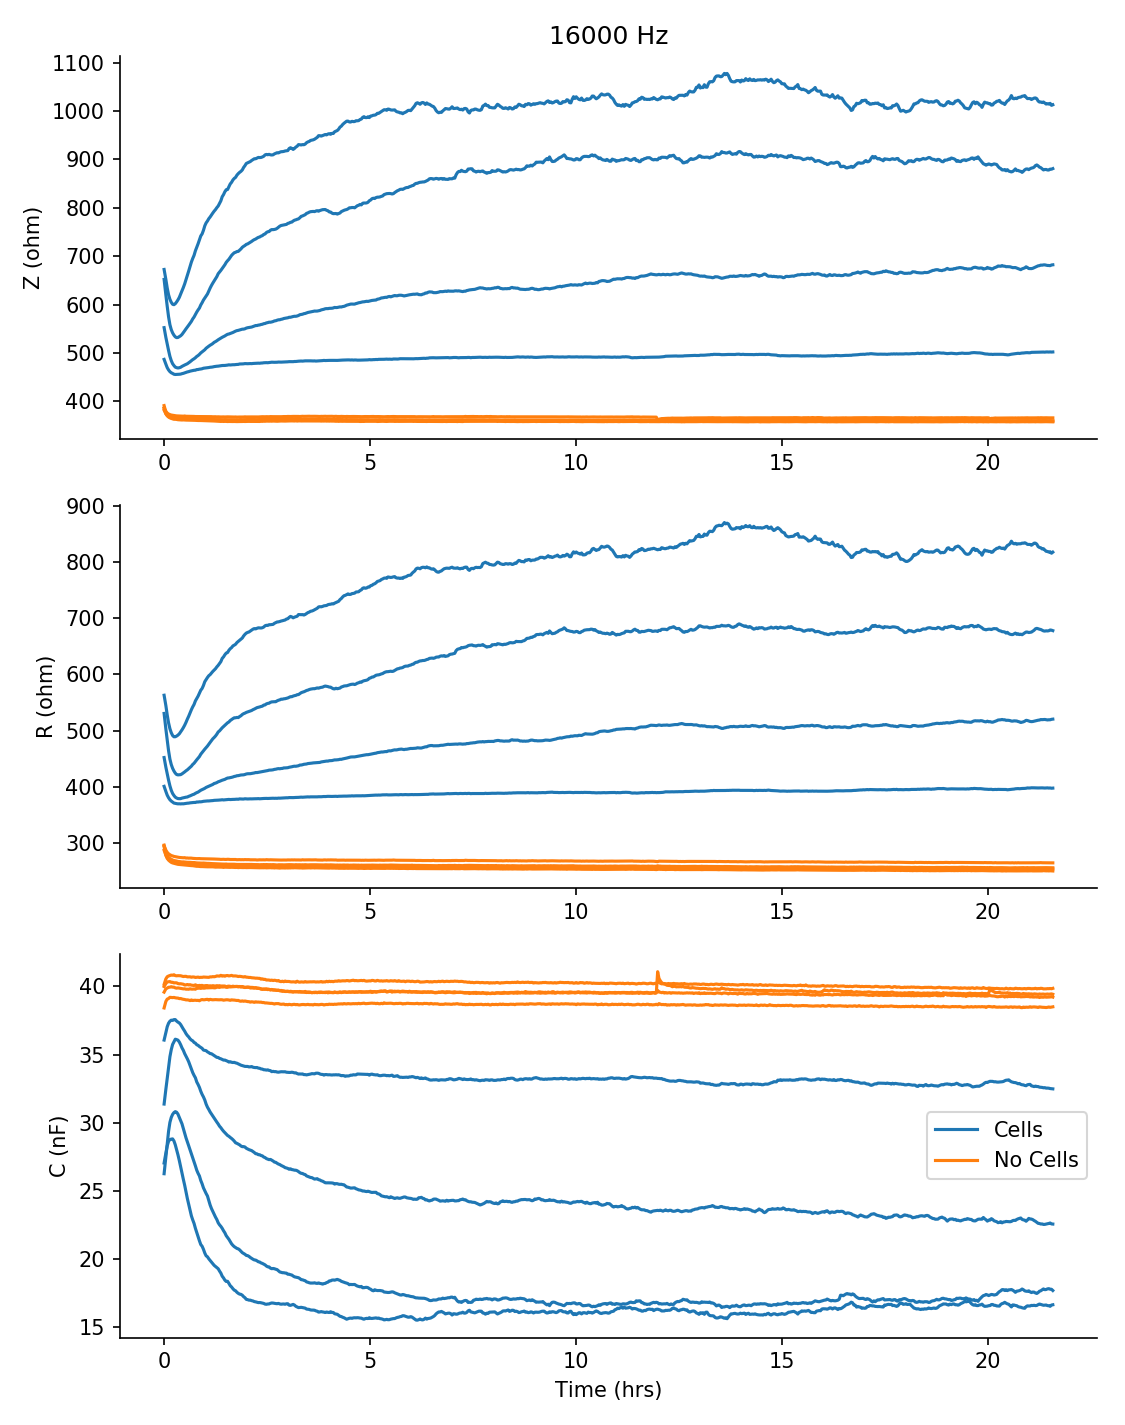

<IPython.core.display.Javascript object>


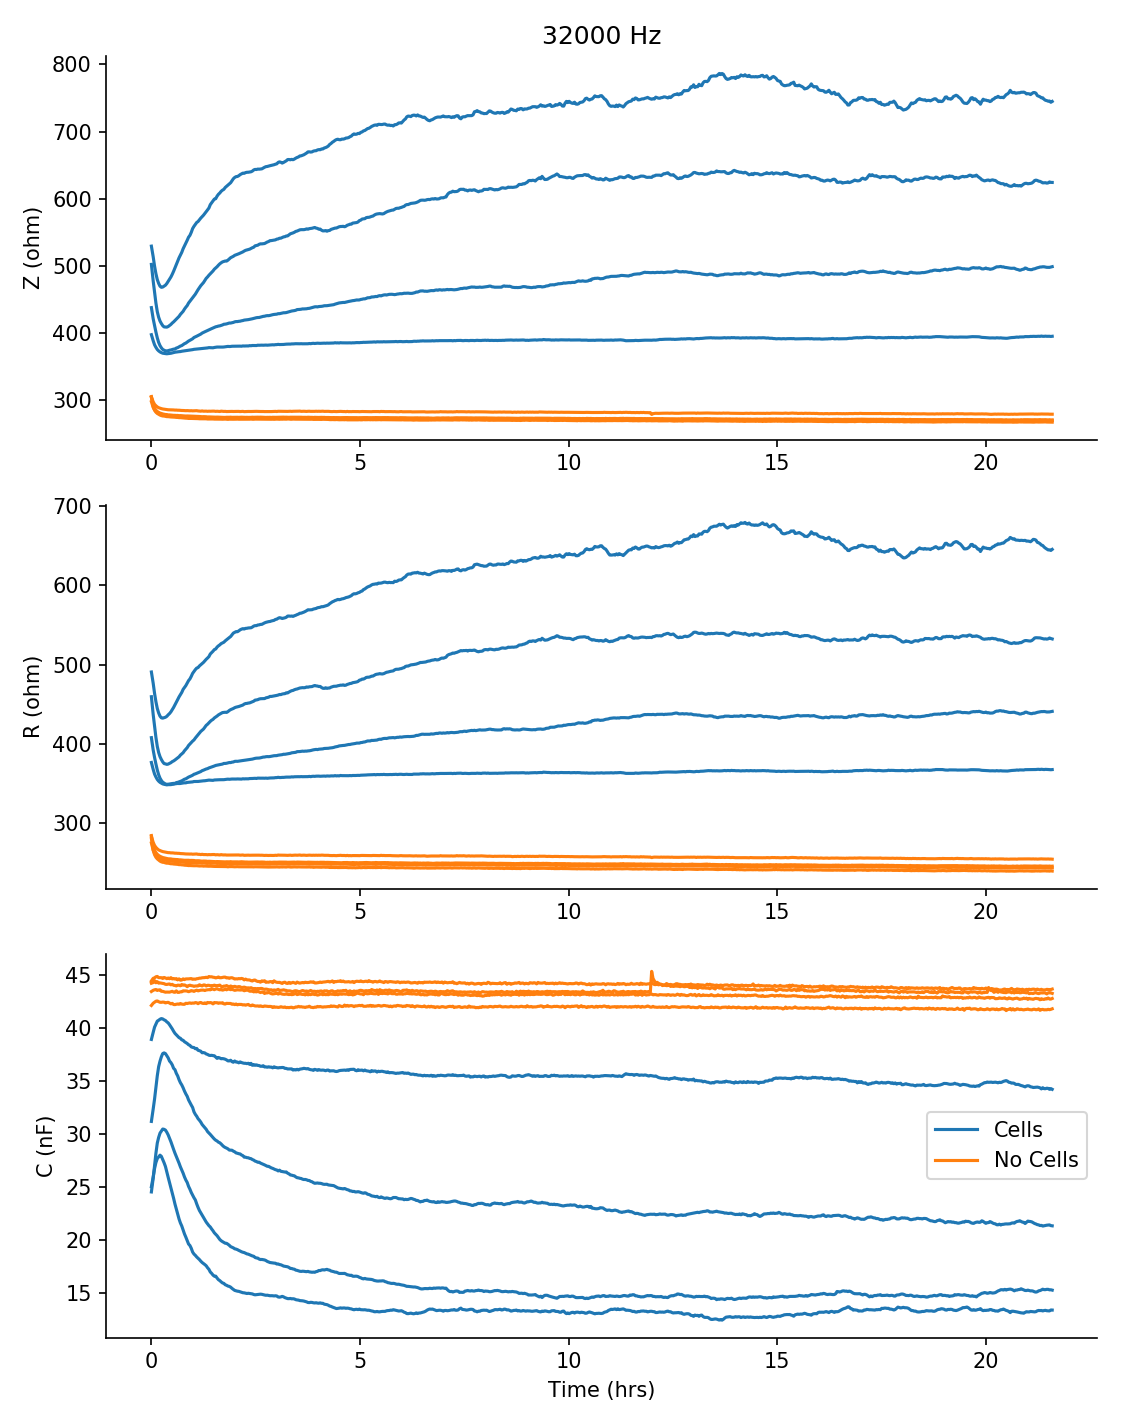

<IPython.core.display.Javascript object>


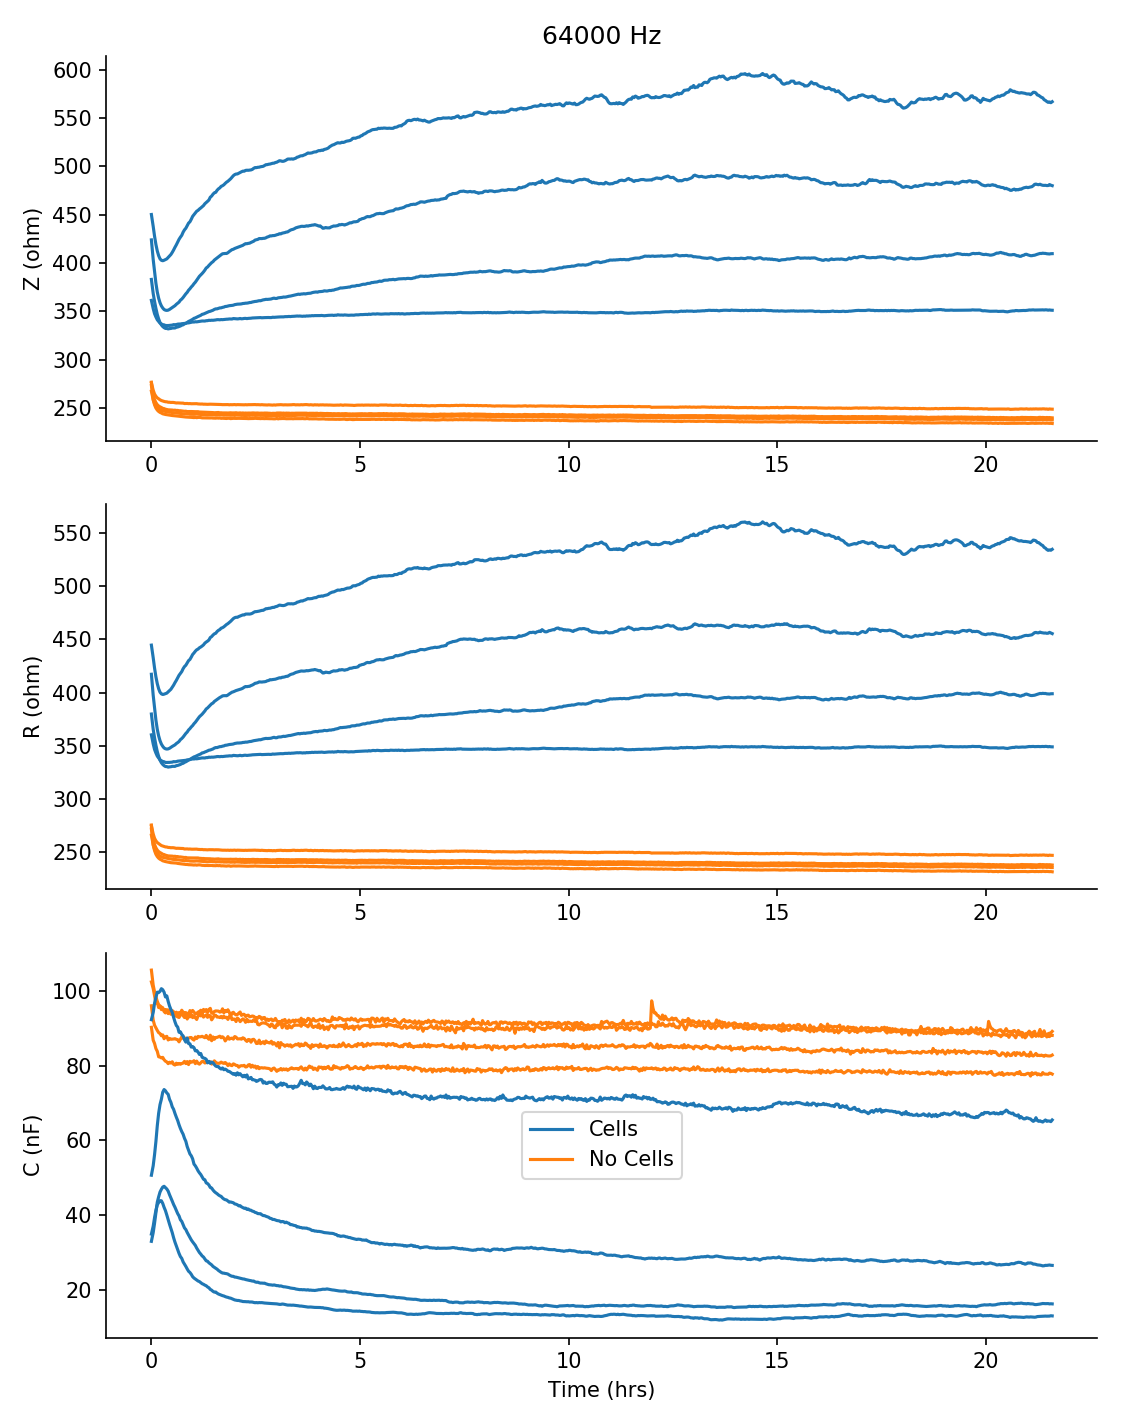

In [272]:
%matplotlib notebook

# Specify variables for the plot
BeanOrGroup = 'Group'  # Can be 'Bean' or 'Group'

# Create subfolder for saving plots to avoid clutter
import os
directory = filepath + '\\AllParametersSingleFrequencySubplots'
if not os.path.exists(directory):
    os.makedirs(directory)

# Plot values on subplots; generate len(fr) number of plots
for i in range(len(fr)):
    fig, axs = plt.subplots(3, 1, figsize = (7.5, 9.5))
    ZRCSubplotSetup(fr[i], 'Time (hrs)', ['Z (ohm)', 'R (ohm)', 'C (nF)'], fig, axs)
    SinglePlot(znames, dat[i], 'Time (hrs)', bngpdict[BeanOrGroup], fig, axs[0])
    SinglePlot(rnames, dat[i], 'Time (hrs)', bngpdict[BeanOrGroup], fig, axs[1])
    SinglePlot(cnames, dat[i], 'Time (hrs)', bngpdict[BeanOrGroup], fig, axs[2])
    
    GenerateLegend(axs[2])
    
    plt.tight_layout()
    plt.savefig(directory + '\\' + fr[i] + ' ' + BeanOrGroup + '.jpg', dpi=200)

### Subplots, single parameter across all frequencies

This cell will generate a plot containing subplots for each frequency; the plot will be for a single parameter, e.g., only 'Z' or only 'R'. Three of these plots will be generated - one for each parameter. These will be saved to a subfolder called 'SingleParameterAllFrequenciesSubplots' with the filename being the parameter plotted and either Bean or Group depending on which was chosen.

You can choose to plot the colors/labels by __bean or group.__ Example of variables you could use (labeling each bean):
>`BeanOrGroup = 'Bean'    # Can be 'Group' or 'Bean'`

<IPython.core.display.Javascript object>


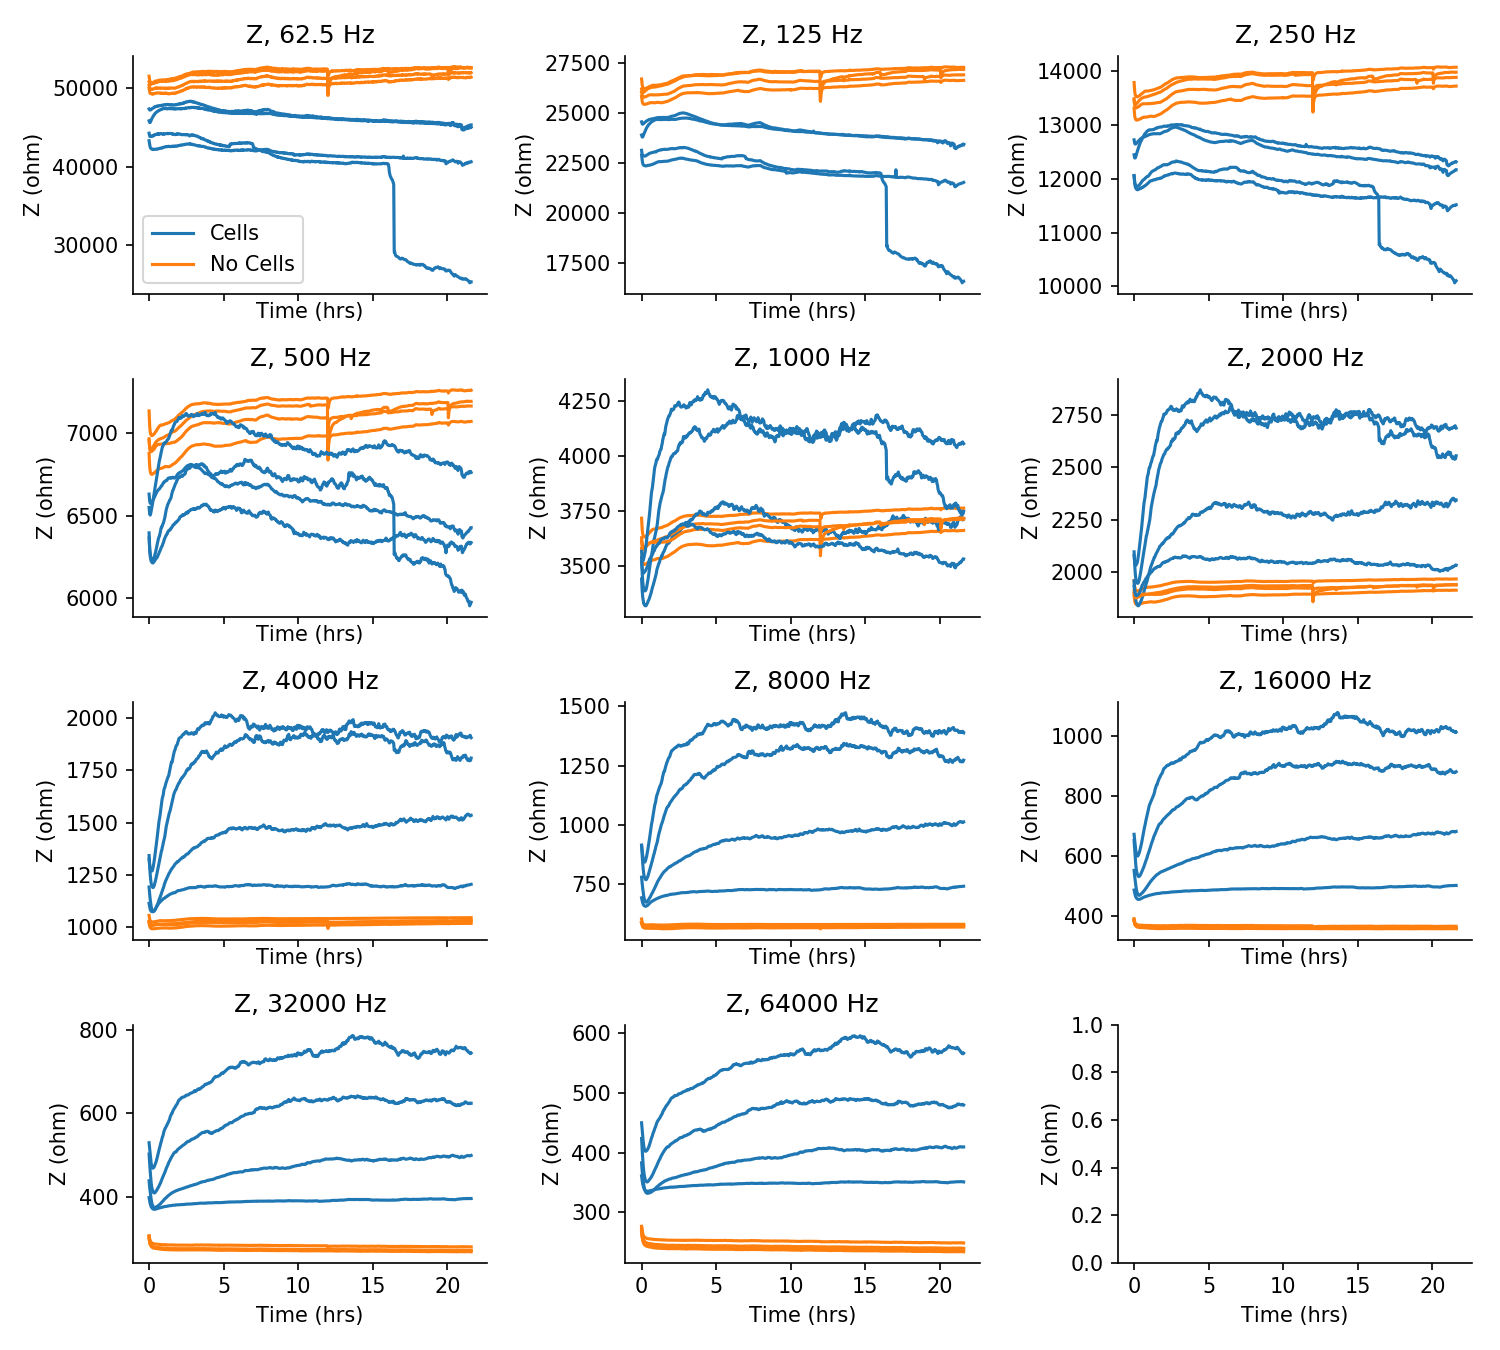

<IPython.core.display.Javascript object>


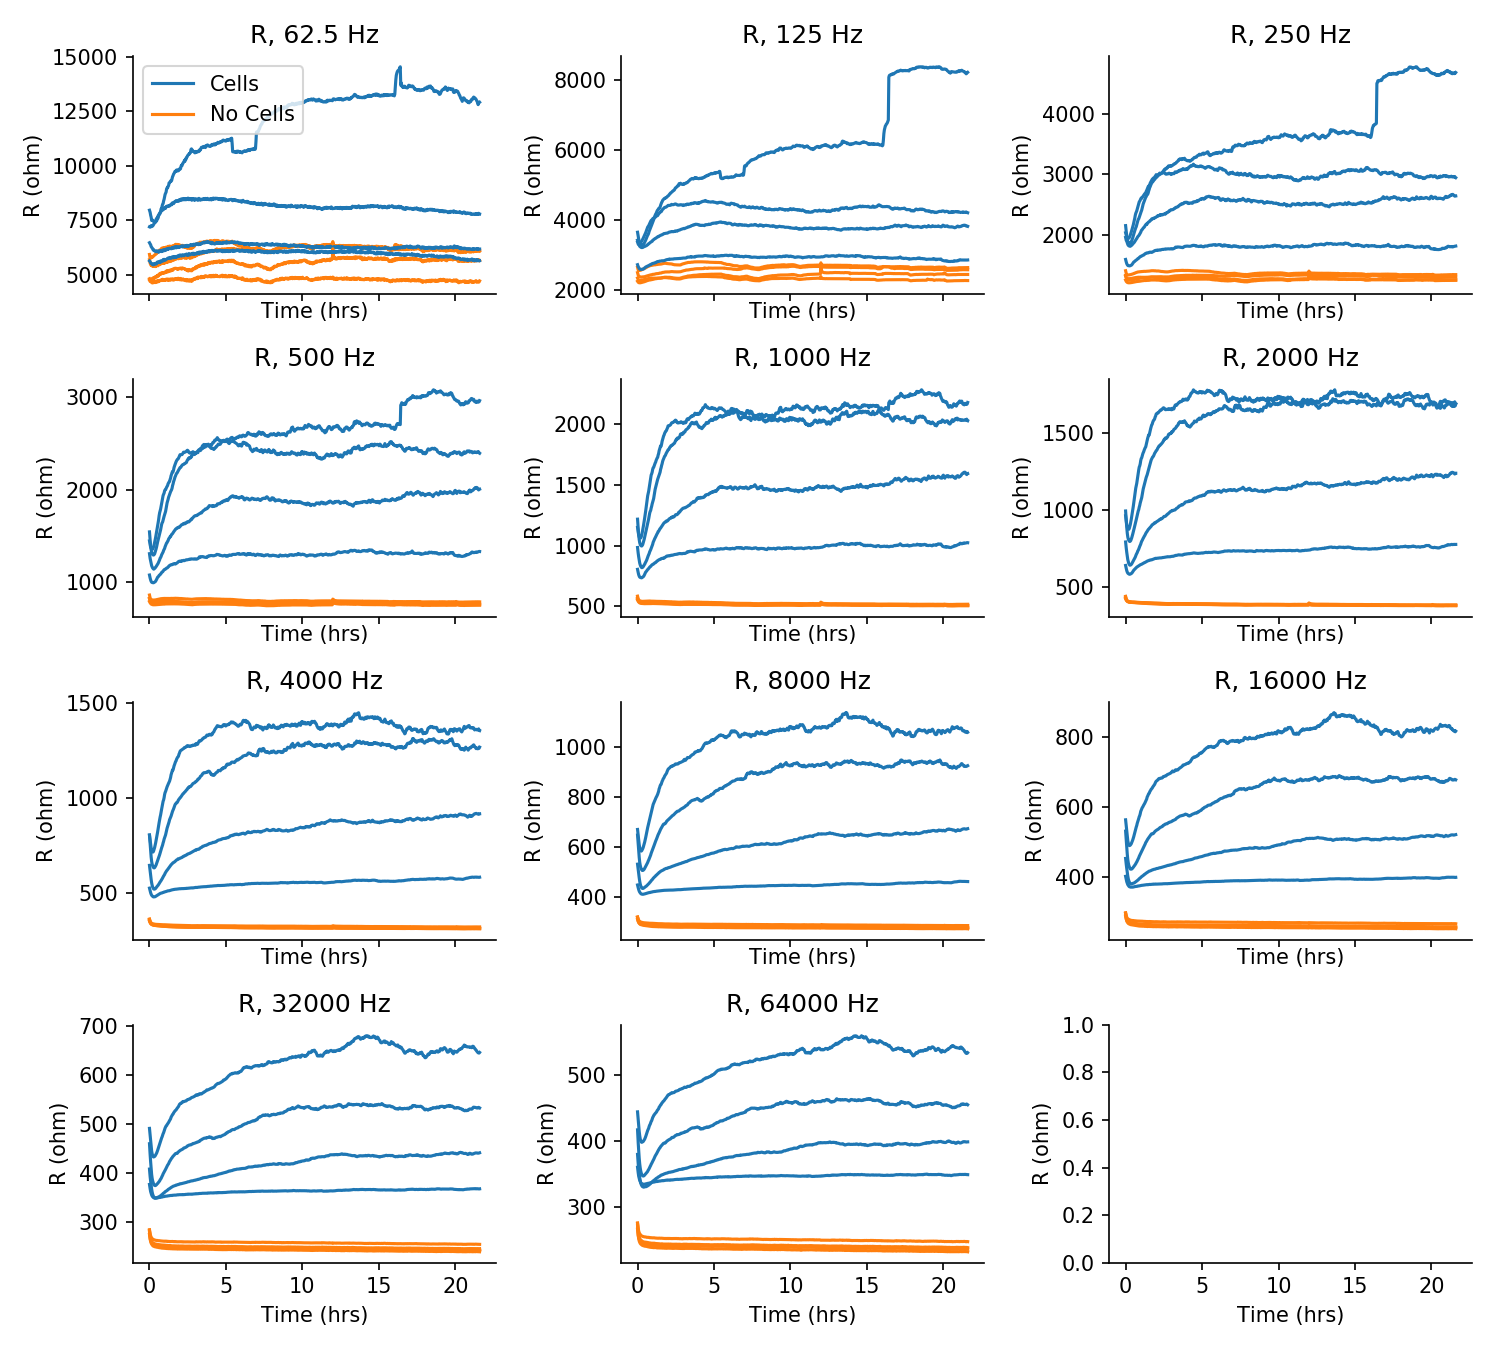

<IPython.core.display.Javascript object>


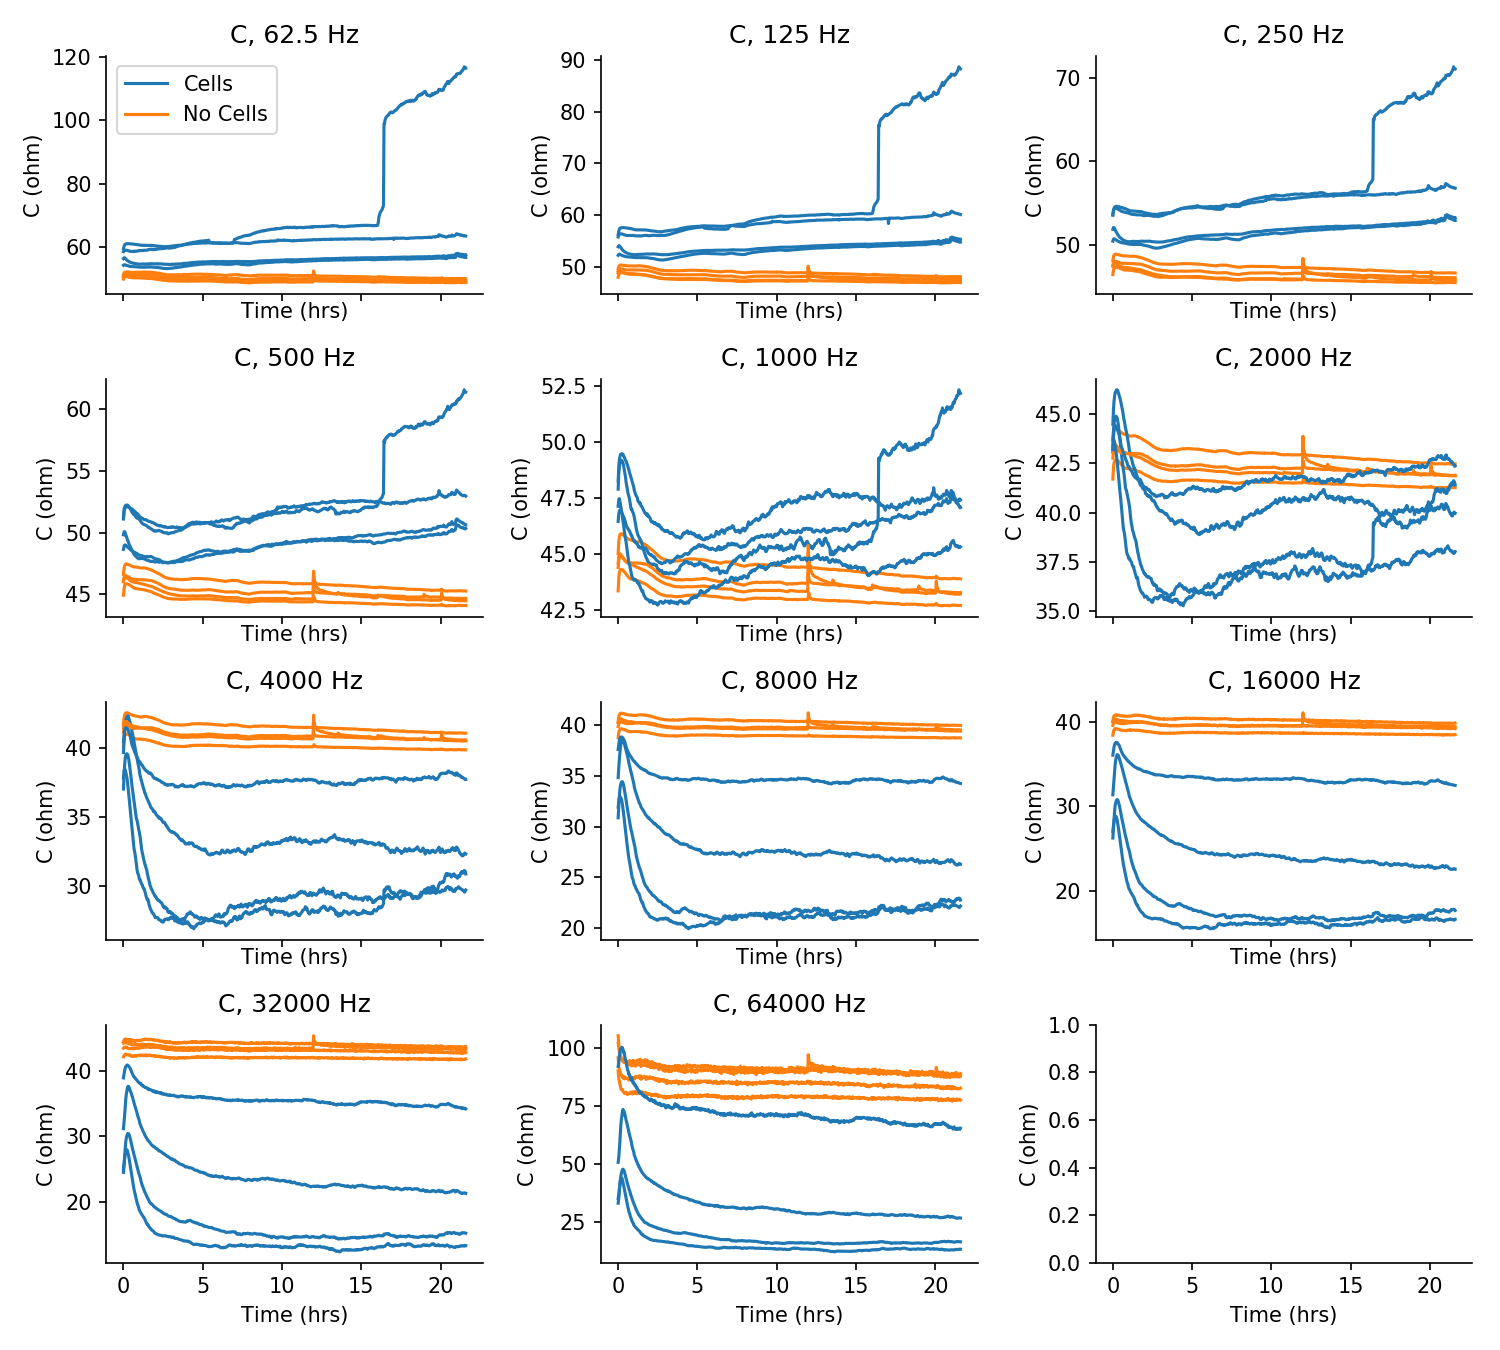

In [273]:
%matplotlib notebook

# Specify variables for the plot
BeanOrGroup = 'Group'  # Can be 'Bean' or 'Group'

# Create subfolder for saving plots to avoid clutter
import os
directory = filepath + '\\SingleParameterAllFrequenciesSubplots'
if not os.path.exists(directory):
    os.makedirs(directory)

# Do the actual plotting - loop through each parameter
for parameter in ['Z','R','C']:
    fig, axs = plt.subplots(npltrows, npltcols, sharex=True, figsize = (10, 9))
    SubplotsSetup(parameter, fig, axs);
    i = 0
    for axrow in axs:
        for ax in axrow:
            if i <= len(fr)-1:
                SinglePlot(namesdict[parameter], dat[i], 'Time (hrs)', bngpdict[BeanOrGroup], fig, ax)
                i += 1
    GenerateLegend(axs[0,0])
    plt.tight_layout()
    plt.savefig(directory + '\\' + parameter + ' ' + BeanOrGroup + '.jpg', dpi=200)

### Single plots, parameter at single time point vs frequency

The following cell will generate plots of Z, R, and C vs frequency for a single time point. You can specify the __time point__ and __bean or group__. These plots will be saved to a subfolder called 'ParametersVsFrequency' with the parameters being the file names, as well as whether Bean or Group was chosen.

Example of variables you could use (labeling each bean, interested in 8.75 hrs):
>`BeanOrGroup = 'Bean'    # Can be 'Group' or 'Bean'
timePoint = 8.75         # Choose a time, in hours`

<IPython.core.display.Javascript object>


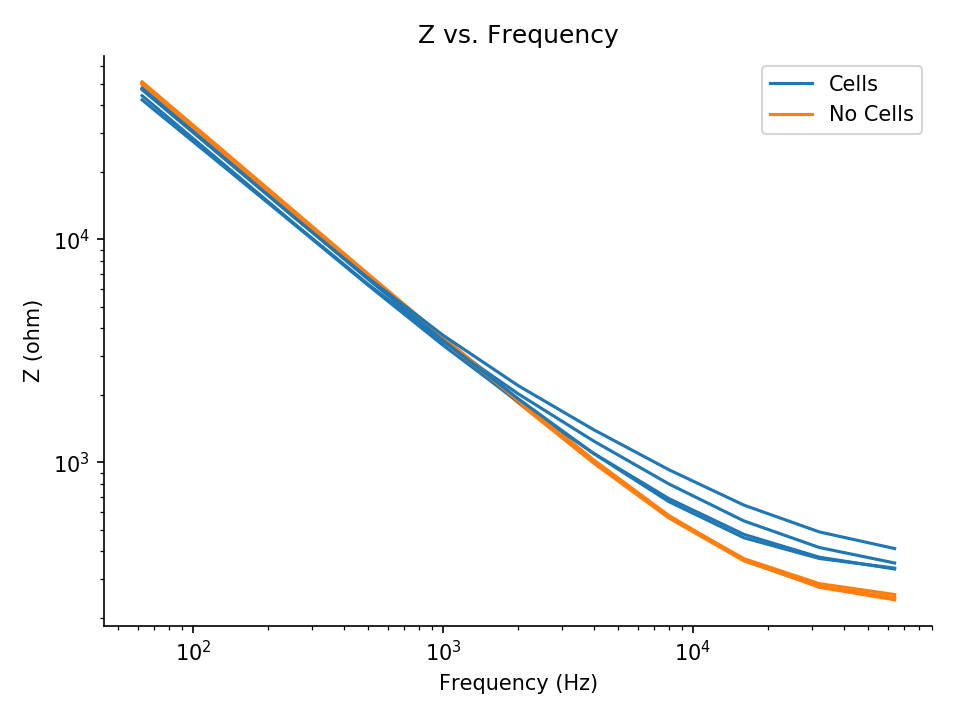

<IPython.core.display.Javascript object>


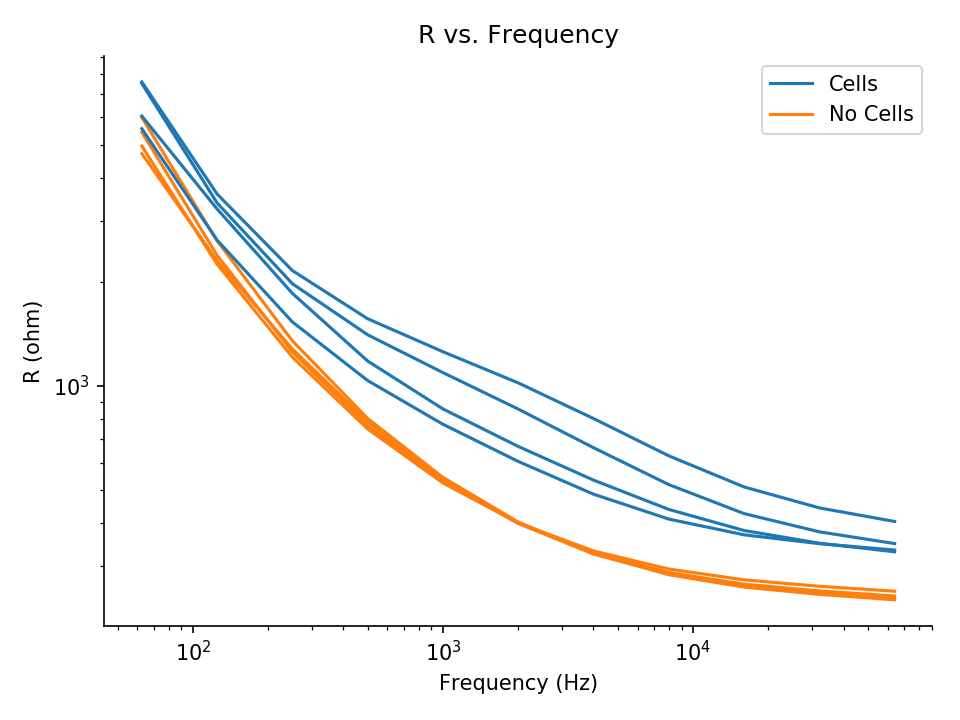

<IPython.core.display.Javascript object>


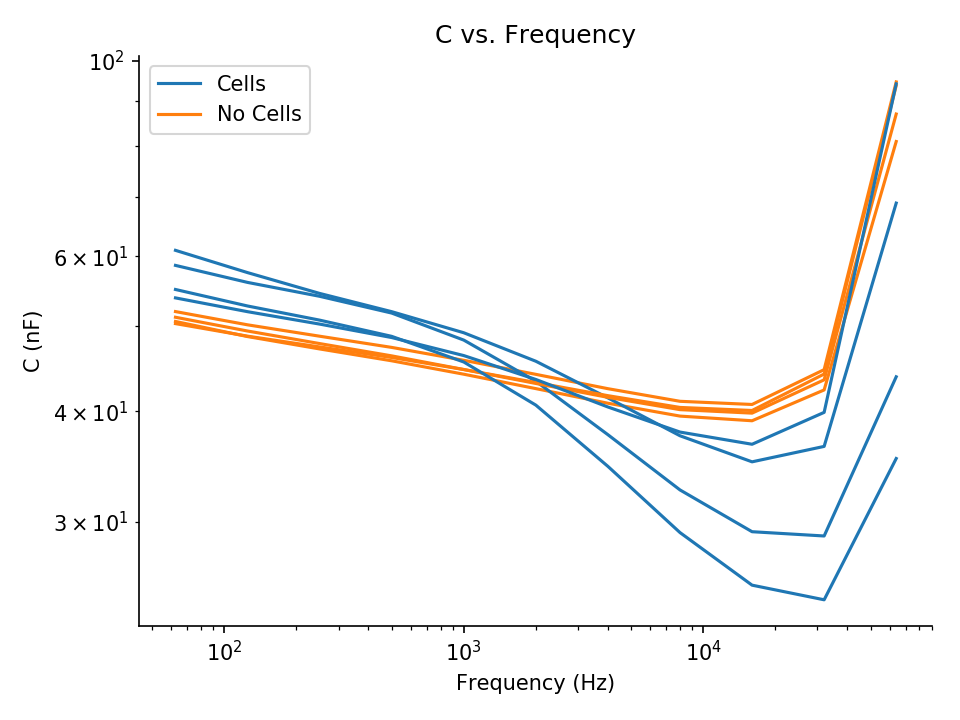

In [276]:
%matplotlib notebook

# Specify variables for the plot
BeanOrGroup = 'Group'  # Can be 'Group' or 'Bean'
timePoint = 0.5        # Choose a time, in hours

# Create subfolder for saving plots to avoid clutter
import os
directory = filepath + '\\ParametersVsFrequency'
if not os.path.exists(directory):
    os.makedirs(directory)

# Find closest time to one specified above
closestTime = dat[0].iloc[(dat[0]['Time (hrs)']-timePoint).abs().argsort()[:1]]['Time (hrs)'].reset_index().iloc[0,1]

# Get the data for a single time point across frequencies
timedat = [dat[i][dat[i]['Time (hrs)'] == closestTime] for i in range(len(fr))]
timedata = pd.concat(timedat)
timedata['Frequency (Hz)'] = [float(x[:-2]) for x in fr]

# Do the actual plotting - loop through each parameter
for parameter in ['Z','R','C']:
    fig, ax = plt.subplots(1, 1)
    SinglePlotSetup(parameter, fr.index(frequency), True, 'Frequency (Hz)', fig, ax)
    SinglePlot(namesdict[parameter], timedata, 'Frequency (Hz)', bngpdict[BeanOrGroup], fig, ax)
    ax.set_xscale('log')
    ax.set_yscale('log')
    GenerateLegend(ax)
    
    plt.tight_layout()
    plt.savefig(directory + '\\' + parameter + ' ' + BeanOrGroup + '.jpg', dpi=200)